In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.manifold import TSNE

In [20]:
train_data = pd.read_csv("mnist_train.csv", low_memory=False, nrows=5000)
test_data = pd.read_csv("mnist_test.csv", low_memory=False, nrows=1000)

In [23]:
train_data.head(5)
# test_data.head(5)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
train_features = train_data.drop("label", axis=1)
train_labels = train_data.iloc[:,0]

In [26]:
# train_features.head(5)
train_labels.head(5)

0    5
1    0
2    4
3    1
4    9
Name: label, dtype: int64

In [27]:
test_features = test_data.drop("label", axis=1)
test_labels = test_data.iloc[:,0]

In [ ]:
# test_features.head(5)
# test_labels.head(5)

In [33]:
error = []
scores_in_percentage = []

for i in range(1, 40):  
    knn_e = KNeighborsClassifier(n_neighbors=i)
    knn_e.fit(train_features, train_labels)
    pred_labels = knn_e.predict(test_features)
    score = 0
    count = 0
    for j in range(len(pred_labels)): # calculating accuracy scores
        count+1 if pred_labels[j] == test_labels[j] else 0
    score = count/len(pred_labels)*100
    scores_in_percentage.append(score) # storing accuracy scores
    error.append(np.mean(pred_labels != test_labels)) # storing mean-error values

In [53]:
print(error)
print(scores_in_percentage)

[0.098, 0.105, 0.091, 0.092, 0.09, 0.096, 0.093, 0.09, 0.095, 0.102, 0.109, 0.107, 0.109, 0.11, 0.109, 0.109, 0.111, 0.117, 0.116, 0.119, 0.12, 0.126, 0.124, 0.127, 0.127, 0.13, 0.131, 0.129, 0.129, 0.124, 0.126, 0.128, 0.129, 0.134, 0.132, 0.132, 0.132, 0.131, 0.131]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


Text(0,0.5,'Mean Error')

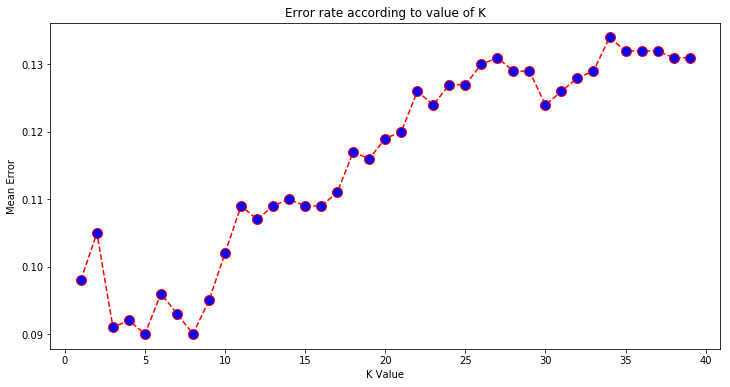

In [54]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error rate according to value of K')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error') 